# Lab | Imbalanced data
We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.

### Instructions
1. Load the dataset and explore the variables.
2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.
3. Extract the target variable.
4. Extract the independent variables and scale them.
5. Build the logistic regression model.
6. Evaluate the model.
7. Even a simple model will give us more than 70% accuracy. Why?
8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?
9. Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [1]:
import pandas as pd
import imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

### 1. Load the dataset and explore the variables.

In [2]:
df = pd.read_csv('/Users/dooinnkim/ironhack_da_may_2023/machine-learning/lab-imbalanced-data/files_for_lab/customer_churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### 2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [8]:
df_pred = df[['Churn','tenure','SeniorCitizen','MonthlyCharges']]

In [9]:
df_pred.head()

,Churn,tenure,SeniorCitizen,MonthlyCharges
0,No,1,0,29.85
1,No,34,0,56.95
2,Yes,2,0,53.85
3,No,45,0,42.30
4,Yes,2,0,70.70


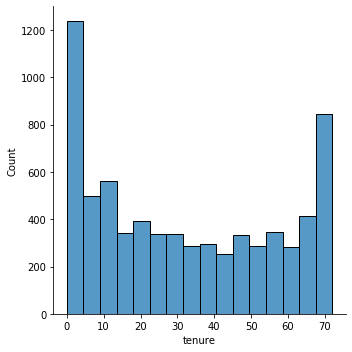

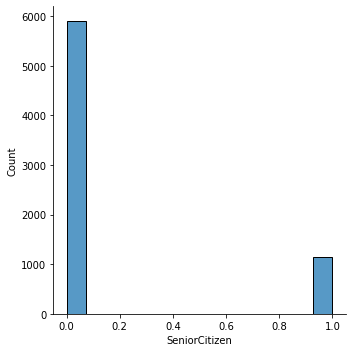

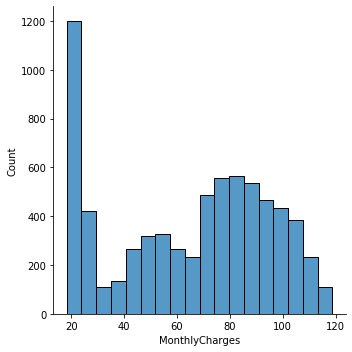

In [10]:
for col in df_pred.select_dtypes(np.number):
    sns.displot(df_pred[col])
    plt.show()

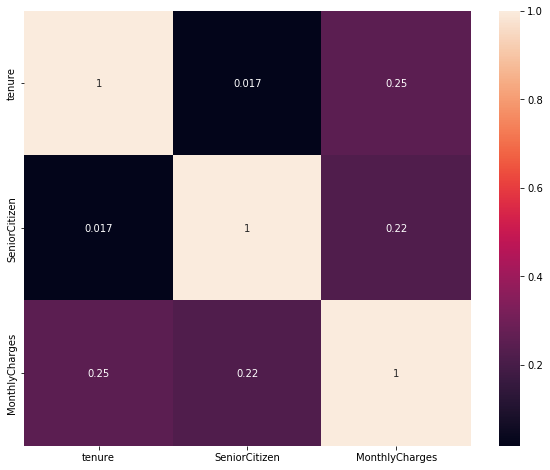

In [11]:
corr_matrix=df_pred.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

### 3. Extract the target variable. 

In [13]:
y = df_pred['Churn']

### 4. Extract the independent variables and scale them.

In [14]:
scaler = StandardScaler()

X = df_pred.drop('Churn', axis=1)
X_scaled = scaler.fit_transform(X)

### 5. Build the logistic regression model.

In [15]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test)


### 6. Evaluate the model.

In [16]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1035
         Yes       0.63      0.45      0.53       374

    accuracy                           0.78      1409
   macro avg       0.73      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



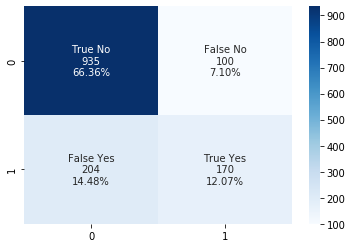

In [17]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True No', 'False No',
               'False Yes', 'True Yes']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

- **True Positive (TP)**: we correctly predicted that they are churned (170)
- **True Negatives (TN)**: we correctly predcited thaty they aren't chruned (935)
- **False Positives (FP)**: we incorrectly prediced that they are churned ("Type I error", 100)
- **False Negatives(FN)**: we incorrectly predicted that they aren't churned ("Type II error", 204)

ROC AUC:  0.818480198403472


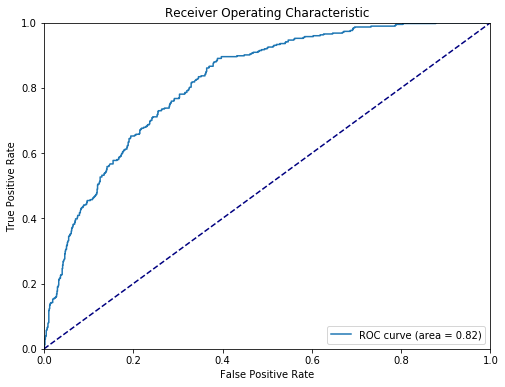

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
# Predict probabilities
probs = classification.predict_proba(X_test)

# keep only probabilities for positive class
probs = probs[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Compute ROC AUC
roc_auc = roc_auc_score(y_test, probs)
print('ROC AUC: ', roc_auc)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### 7. Even a simple model will give us more than 70% accuracy. Why?

The accuracy of a model refers to the proportion of correct predictions it makes out of all predictions. In a binary classification problem, this would be the number of true positives (actual churned customers correctly identified as such) and true negatives (actual non-churned customers correctly identified as such) divided by the total number of predictions.

The overall accuracy is around 78%. This means that the model correctly predicts whether a customer will churn or not approximately 78% of the time.

However, accuracy isn't always the best metric to evaluate a model, particularly when dealing with imbalanced datasets (i.e. the number of non-churning customers is likely much larger than the number of churning customers).

Models trained on imbalanced datasets may achieve high accuracy by simply predicting the majority class in all cases. Thus, it would likely miss many of the churned customers (the minority class) that we are most interested in identifying.

From the following section, we will further investigate recall, precision, and the ROC AUC for the evaluation of various models (SMOTE and Tomek Links). These metrics will give a better picture of how well the models are performing on the minority class (churning customers), which is crucial for the business objective of reducing churn.

### 8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [22]:
from imblearn.over_sampling import SMOTE

X = df_pred.drop('Churn', axis=1)
y = df_pred['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

classification = LogisticRegression(random_state=42, max_iter=100000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.88      0.71      0.79      1035
         Yes       0.48      0.72      0.57       374

    accuracy                           0.72      1409
   macro avg       0.68      0.72      0.68      1409
weighted avg       0.77      0.72      0.73      1409



In [23]:
print(metrics.confusion_matrix(y_test, predictions))

[[738 297]
 [104 270]]


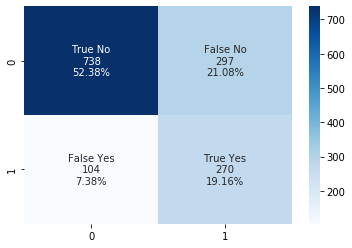

In [24]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True No', 'False No',
               'False Yes', 'True Yes']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ROC AUC:  0.8077462605595597


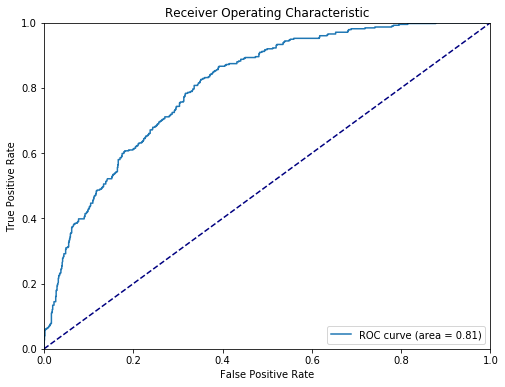

In [25]:
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Predict probabilities
probs = classification.predict_proba(X_test)

# keep only probabilities for positive class
probs = probs[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Compute ROC AUC
roc_auc = roc_auc_score(y_test, probs)
print('ROC AUC: ', roc_auc)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### 9. Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [26]:
from imblearn.under_sampling import TomekLinks

X = df_pred.drop('Churn', axis=1)
y = df_pred['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

tomek = TomekLinks()
X_train, y_train = tomek.fit_resample(X_train, y_train)

classification = LogisticRegression(random_state=42, max_iter=100000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.84      0.87      0.85      1035
         Yes       0.59      0.54      0.56       374

    accuracy                           0.78      1409
   macro avg       0.71      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409



In [27]:
print(metrics.confusion_matrix(y_test, predictions))

[[896 139]
 [173 201]]


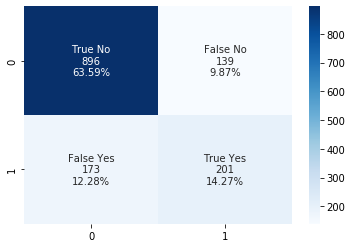

In [28]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True No', 'False No',
               'False Yes', 'True Yes']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ROC AUC:  0.8183406959621794


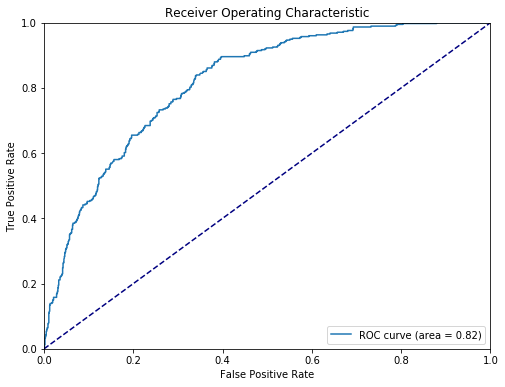

In [29]:
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Predict probabilities
probs = classification.predict_proba(X_test)

# keep only probabilities for positive class
probs = probs[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Compute ROC AUC
roc_auc = roc_auc_score(y_test, probs)
print('ROC AUC: ', roc_auc)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Conclusion

### Classfication Report

To determine the best model for our business need, we should focus on the business objective, which in this case is to reduce customer churn. This means we want to correctly identify as many customers who are likely to churn (labelled "Yes") as possible, so that the business can then intervene to try and prevent this.

This corresponds to maximizing the recall for the "Yes" class, which is also known as sensitivity. The recall of a model for a particular class is the number of true positives (i.e., the model correctly predicted "Yes") divided by the sum of true positives and false negatives (i.e., the model incorrectly predicted "No"). A high recall indicates a low false negative rate, and thus we are correctly identifying more customers who are about to churn.


- 1. **Basic Model**: Yes - Recall = 0.45

- 2. **SMOTE**: Yes - Recall = 0.72

- 3. **Tomek Links**: Yes - Recall = 0.54

The model with SMOTE oversampling technique has the highest recall for the "Yes" class. Hence, it will be best suited for the business needs since it is correctly identifying more customers who are likely to churn, giving the business a better chance to intervene and potentially prevent this from happening.



### ROC_AUC Score

The Receiver Operating Characteristic Area Under Curve (ROC AUC) is a measure of a model's predictive performance. A higher ROC AUC indicates a better model, with a ROC AUC of 1.0 representing a perfect model.

- 1. **Basic model**:  0.818480198403472
- 2. **SMOTE**: 0.8077462605595597
- 3. **Tomel Links**: 0.8183406959621794


The Basic model and the Tomek Links model have higher ROC AUC scores (0.81848 and 0.81834, respectively) compared to the SMOTE model (0.80775). This suggests that both the Basic model and the Tomek Links model are slightly better at predicting churn compared to the SMOTE model.

However,the differences between these ROC AUC scores are very small. This suggests that all three models are performing similarly.